In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds

C:\Users\16479\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
(ds_train, ds_validation, ds_test), ds_info = tfds.load(
    'stanford_dogs',
    split=['train', 'test[:50%]', 'test[50%:]'],
    with_info=True,
    as_supervised=True,
)

In [5]:
def preprocess(image, label):
    image = tf.image.resize(image, [224, 224])  # Resize images
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values
    return image, label

In [6]:
ds_train = ds_train.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
ds_validation = ds_validation.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(ds_info.features['label'].num_classes, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 128)      

In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

model_checkpoint = ModelCheckpoint(
    'best_model.h5', 
    monitor='val_loss', 
    save_best_only=True
)

# Train the model
history = model.fit(
    ds_train,
    validation_data=ds_validation,
    epochs=10,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/10
375/375 [==============================] - ETA: 0s - loss: 4.7698 - accuracy: 0.0114

C:\Users\16479\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


375/375 [==============================] - 551s 1s/step - loss: 4.7698 - accuracy: 0.0114 - val_loss: 4.6682 - val_accuracy: 0.0170
Epoch 2/10
375/375 [==============================] - 601s 2s/step - loss: 4.6037 - accuracy: 0.0221 - val_loss: 4.5631 - val_accuracy: 0.0268
Epoch 3/10
375/375 [==============================] - 606s 2s/step - loss: 4.3290 - accuracy: 0.0604 - val_loss: 4.5693 - val_accuracy: 0.0347
Epoch 4/10
375/375 [==============================] - 685s 2s/step - loss: 3.6414 - accuracy: 0.1803 - val_loss: 4.8941 - val_accuracy: 0.0331
Epoch 5/10
375/375 [==============================] - 716s 2s/step - loss: 2.7334 - accuracy: 0.3647 - val_loss: 5.5007 - val_accuracy: 0.0333


In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'), 
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(ds_info.features['label'].num_classes, activation='softmax')
])

In [11]:
from tensorflow.keras.optimizers import SGD, RMSprop, Adamax, Nadam

In [10]:
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

model_checkpoint = ModelCheckpoint(
    'best_model.h5', 
    monitor='val_loss', 
    save_best_only=True
)

# Train the model
history = model.fit(
    ds_train,
    validation_data=ds_validation,
    epochs=10,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/10
375/375 [==============================] - 727s 2s/step - loss: 4.7892 - accuracy: 0.0074 - val_loss: 4.7862 - val_accuracy: 0.0117
Epoch 2/10
375/375 [==============================] - 692s 2s/step - loss: 4.7865 - accuracy: 0.0094 - val_loss: 4.7837 - val_accuracy: 0.0119
Epoch 3/10
375/375 [==============================] - 713s 2s/step - loss: 4.7843 - accuracy: 0.0111 - val_loss: 4.7807 - val_accuracy: 0.0145
Epoch 4/10
375/375 [==============================] - 1191s 3s/step - loss: 4.7776 - accuracy: 0.0136 - val_loss: 4.7702 - val_accuracy: 0.0128
Epoch 5/10
375/375 [==============================] - 508s 1s/step - loss: 4.7638 - accuracy: 0.0174 - val_loss: 4.7417 - val_accuracy: 0.0184
Epoch 6/10
375/375 [==============================] - 652s 2s/step - loss: 4.7369 - accuracy: 0.0168 - val_loss: 4.7029 - val_accuracy: 0.0221
Epoch 7/10
375/375 [==============================] - 745s 2s/step - loss: 4.6983 - accuracy: 0.0215 - val_loss: 4.6618 - val_accuracy: 0.022

In [16]:

model = Sequential([
    # First block
    Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(2, 2),

    # Second block
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(2, 2),

    # Third block
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(2, 2),

    # Fourth block
    Conv2D(512, (3, 3), padding='same', activation='relu'),
    Conv2D(512, (3, 3), padding='same', activation='relu'),
    Conv2D(512, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(2, 2),

    # Fifth block
    Conv2D(512, (3, 3), padding='same', activation='relu'),
    Conv2D(512, (3, 3), padding='same', activation='relu'),
    Conv2D(512, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(2, 2),

    # Fully connected layers
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(ds_info.features['label'].num_classes, activation='softmax')  
])

model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_24 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_26 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 56, 56, 128)       0         
 ng2D)                                                

In [18]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

model_checkpoint = ModelCheckpoint(
    'best_model.h5', 
    monitor='val_loss', 
    save_best_only=True
)

# Train the model
history = model.fit(
    ds_train,
    validation_data=ds_validation,
    epochs=10,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/10
165/375 [============>.................] - ETA: 1:01:20 - loss: 4.7922 - accuracy: 0.0087

In [11]:
test_loss, test_accuracy = model.evaluate(ds_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

135/135 [==============================] - 46s 337ms/step - loss: 4.7864 - accuracy: 0.0079
Test Accuracy: 0.79%


In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


y_pred = model.predict(ds_test)
y_pred_classes = np.argmax(y_pred, axis=1)


y_true = np.concatenate([y for x, y in ds_test], axis=0)


cm = confusion_matrix(y_true, y_pred_classes)


135/135 [==============================] - 59s 430ms/step


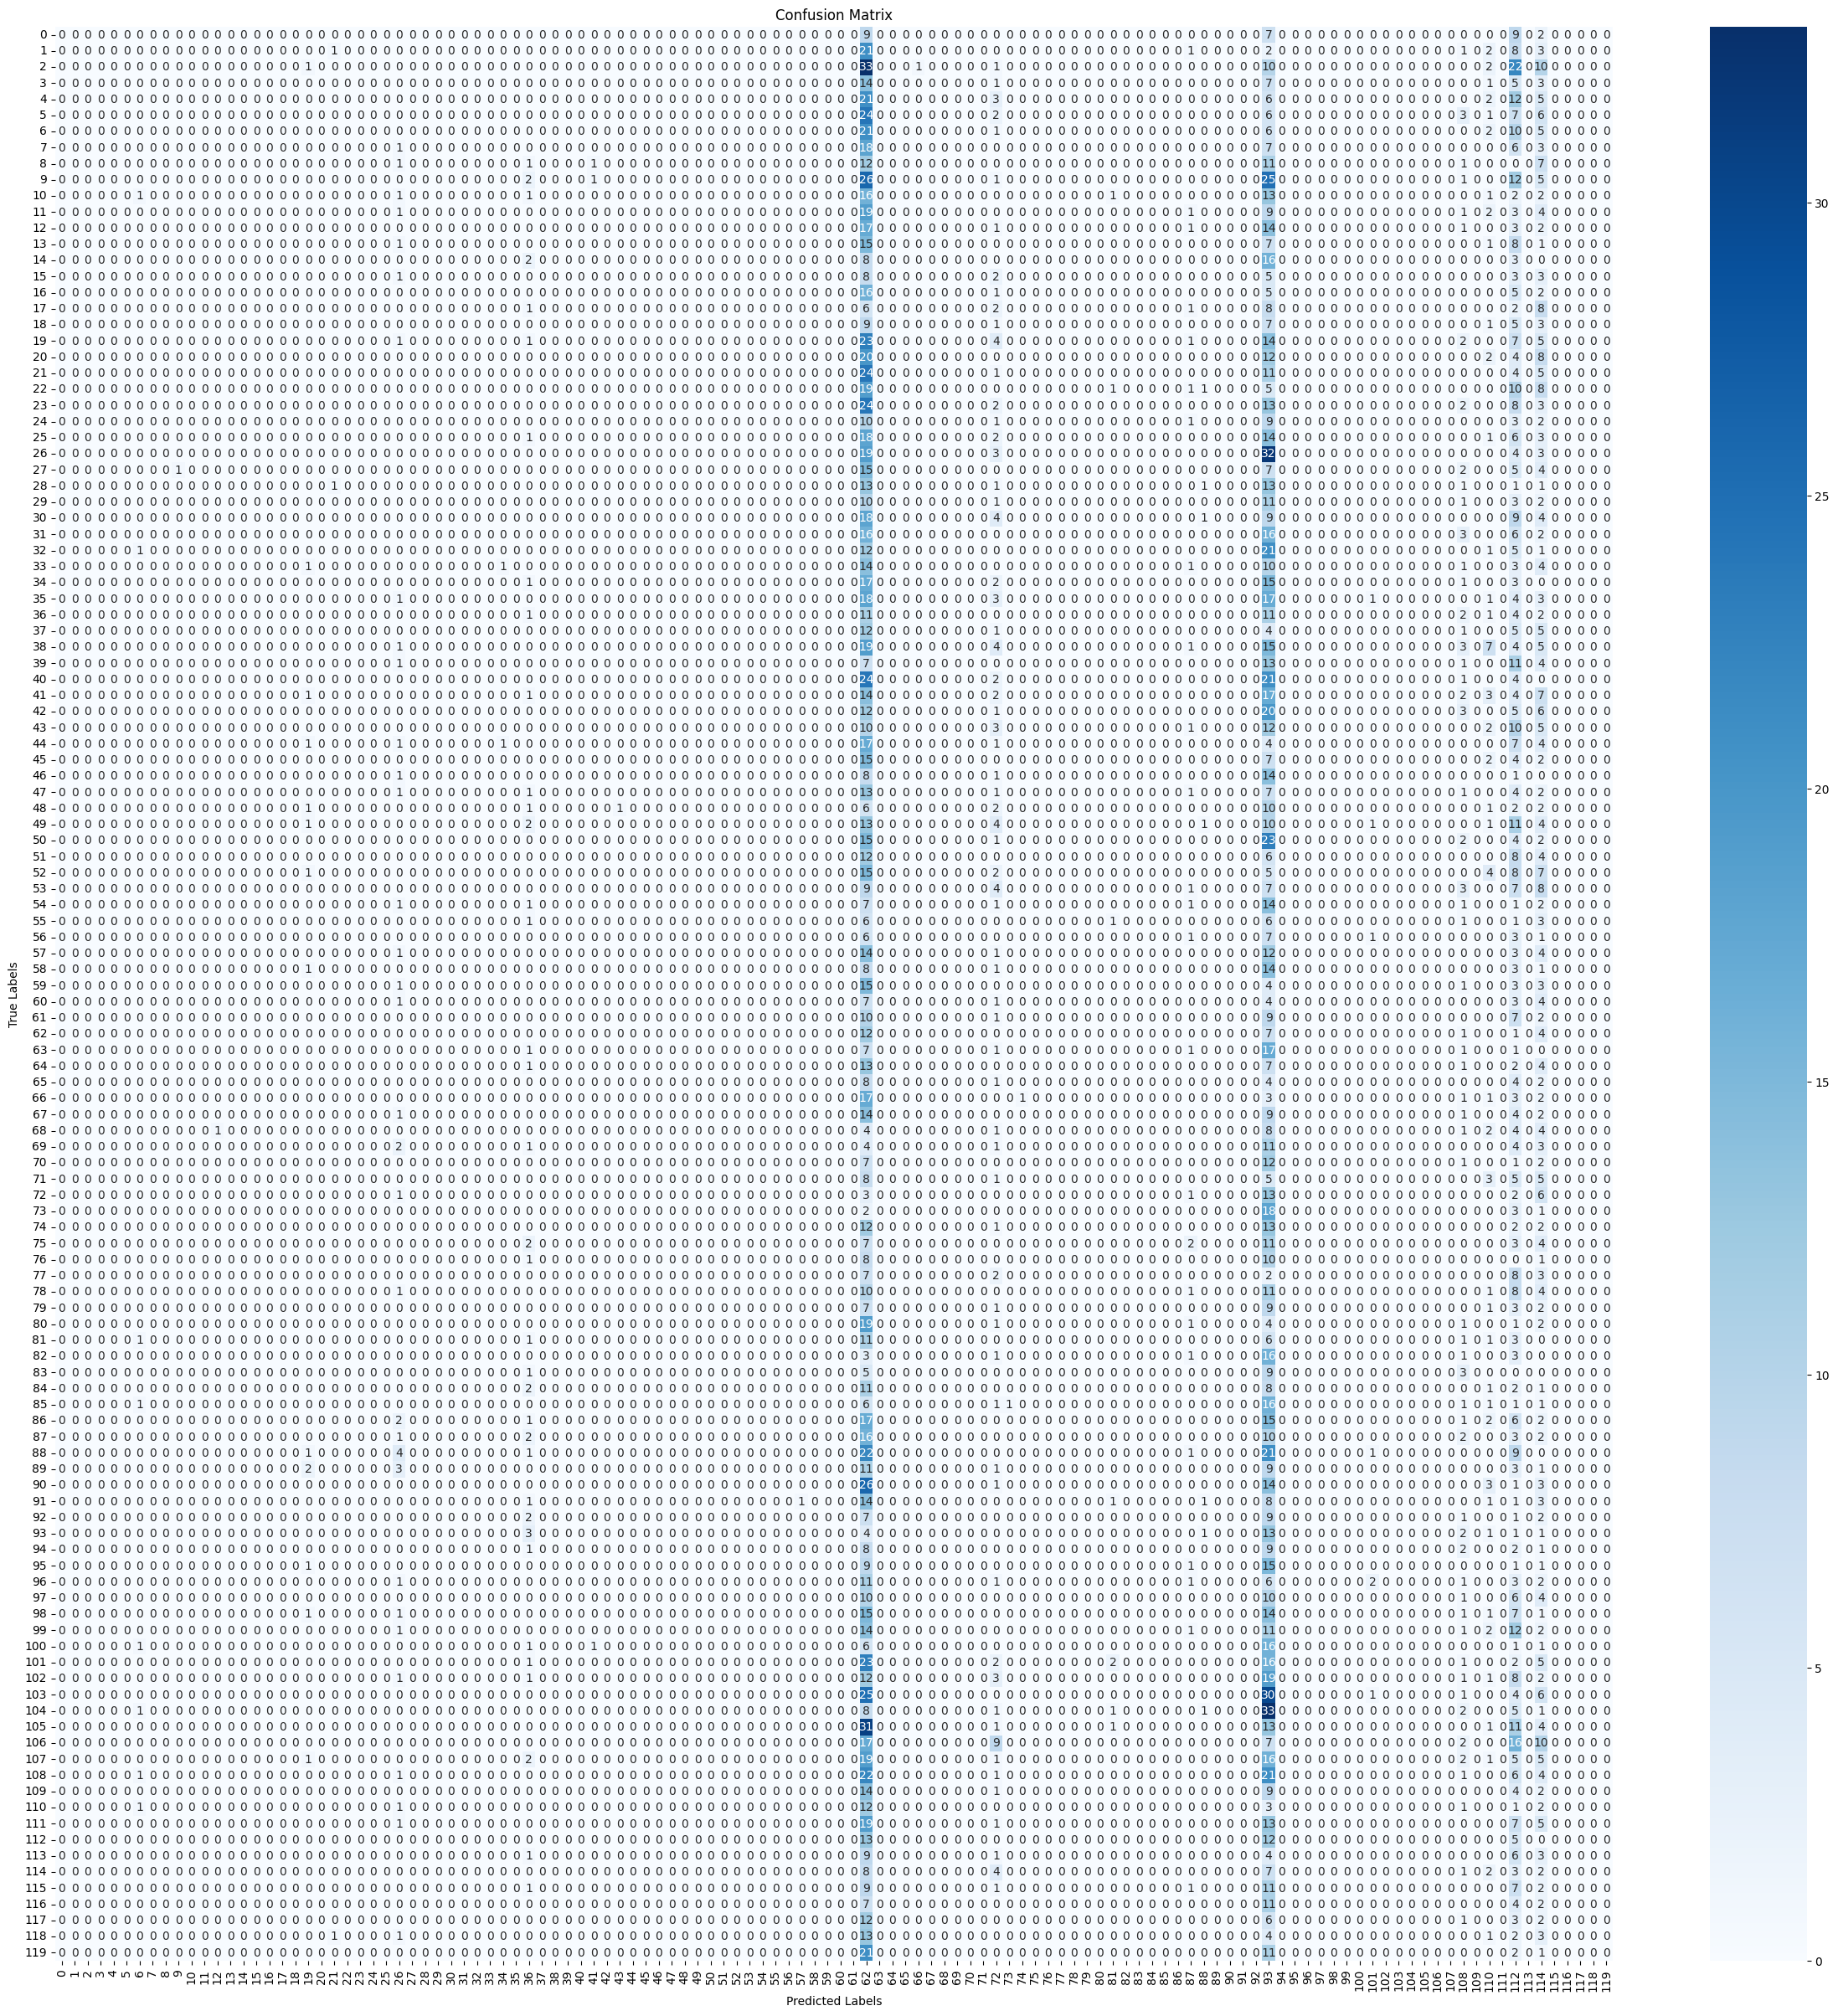

In [14]:
# Plotting the confusion matrix
plt.figure(figsize=(30, 30))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
